## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.322026  1398.173698  0.538686  8.276031  1.603191
1  89.619858   509.163508  0.108581  8.556405  0.639425
2  47.973917  1629.868609  0.115474  9.264881  1.354111
3  95.087917  1103.979012  0.769960  7.294759  1.395407
4  85.440228   285.785658  0.495307  3.038843  1.040090


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0151112	total: 56.1ms	remaining: 56s
1:	learn: 1.0050485	total: 56.6ms	remaining: 28.2s
2:	learn: 0.9942989	total: 57ms	remaining: 19s
3:	learn: 0.9819421	total: 58ms	remaining: 14.4s
4:	learn: 0.9708625	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9600306	total: 59.2ms	remaining: 9.8s
6:	learn: 0.9510929	total: 59.6ms	remaining: 8.45s
7:	learn: 0.9413554	total: 60.2ms	remaining: 7.47s
8:	learn: 0.9305414	total: 60.7ms	remaining: 6.68s
9:	learn: 0.9218667	total: 61.3ms	remaining: 6.07s
10:	learn: 0.9129559	total: 61.9ms	remaining: 5.56s
11:	learn: 0.9030911	total: 62.4ms	remaining: 5.13s
12:	learn: 0.8951037	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8847810	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8750584	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8673278	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8566462	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8491298	total: 65.9ms	remaining: 3.6s
18:	learn: 0.8411587	total: 66.6ms	remaining: 3.44s
19

41:	learn: 0.6796335	total: 78.3ms	remaining: 1.78s
42:	learn: 0.6731765	total: 79.3ms	remaining: 1.76s
43:	learn: 0.6670820	total: 79.9ms	remaining: 1.74s
44:	learn: 0.6609196	total: 80.3ms	remaining: 1.7s
45:	learn: 0.6540342	total: 81ms	remaining: 1.68s
46:	learn: 0.6497085	total: 81.5ms	remaining: 1.65s
47:	learn: 0.6445219	total: 81.8ms	remaining: 1.62s
48:	learn: 0.6393354	total: 82.2ms	remaining: 1.59s
49:	learn: 0.6345494	total: 82.7ms	remaining: 1.57s
50:	learn: 0.6297125	total: 83.3ms	remaining: 1.55s
51:	learn: 0.6241375	total: 83.7ms	remaining: 1.53s
52:	learn: 0.6195171	total: 84.2ms	remaining: 1.5s
53:	learn: 0.6134975	total: 84.7ms	remaining: 1.48s
54:	learn: 0.6085146	total: 85.1ms	remaining: 1.46s
55:	learn: 0.6030154	total: 85.6ms	remaining: 1.44s
56:	learn: 0.5978039	total: 86ms	remaining: 1.42s
57:	learn: 0.5940609	total: 86.4ms	remaining: 1.4s
58:	learn: 0.5883955	total: 86.9ms	remaining: 1.39s
59:	learn: 0.5832353	total: 87.3ms	remaining: 1.37s
60:	learn: 0.579757

253:	learn: 0.1901617	total: 165ms	remaining: 486ms
254:	learn: 0.1891953	total: 166ms	remaining: 486ms
255:	learn: 0.1880743	total: 167ms	remaining: 485ms
256:	learn: 0.1873318	total: 168ms	remaining: 484ms
257:	learn: 0.1866431	total: 168ms	remaining: 483ms
258:	learn: 0.1853589	total: 168ms	remaining: 482ms
259:	learn: 0.1846348	total: 169ms	remaining: 480ms
260:	learn: 0.1838791	total: 169ms	remaining: 479ms
261:	learn: 0.1828190	total: 170ms	remaining: 478ms
262:	learn: 0.1820290	total: 170ms	remaining: 477ms
263:	learn: 0.1811987	total: 171ms	remaining: 476ms
264:	learn: 0.1803783	total: 171ms	remaining: 475ms
265:	learn: 0.1799070	total: 171ms	remaining: 473ms
266:	learn: 0.1788841	total: 172ms	remaining: 472ms
267:	learn: 0.1781685	total: 172ms	remaining: 471ms
268:	learn: 0.1773872	total: 173ms	remaining: 470ms
269:	learn: 0.1766340	total: 173ms	remaining: 468ms
270:	learn: 0.1758574	total: 174ms	remaining: 467ms
271:	learn: 0.1751248	total: 174ms	remaining: 466ms
272:	learn: 

430:	learn: 0.1089895	total: 239ms	remaining: 315ms
431:	learn: 0.1085607	total: 240ms	remaining: 315ms
432:	learn: 0.1081022	total: 240ms	remaining: 314ms
433:	learn: 0.1079571	total: 241ms	remaining: 314ms
434:	learn: 0.1079133	total: 241ms	remaining: 313ms
435:	learn: 0.1074655	total: 241ms	remaining: 312ms
436:	learn: 0.1073400	total: 242ms	remaining: 311ms
437:	learn: 0.1069195	total: 242ms	remaining: 311ms
438:	learn: 0.1064816	total: 243ms	remaining: 310ms
439:	learn: 0.1060693	total: 243ms	remaining: 309ms
440:	learn: 0.1056325	total: 243ms	remaining: 309ms
441:	learn: 0.1055901	total: 244ms	remaining: 308ms
442:	learn: 0.1054740	total: 244ms	remaining: 307ms
443:	learn: 0.1054327	total: 244ms	remaining: 306ms
444:	learn: 0.1050284	total: 245ms	remaining: 305ms
445:	learn: 0.1046068	total: 245ms	remaining: 304ms
446:	learn: 0.1042103	total: 246ms	remaining: 304ms
447:	learn: 0.1041699	total: 246ms	remaining: 303ms
448:	learn: 0.1037472	total: 247ms	remaining: 303ms
449:	learn: 

636:	learn: 0.0642488	total: 325ms	remaining: 185ms
637:	learn: 0.0641101	total: 326ms	remaining: 185ms
638:	learn: 0.0640350	total: 326ms	remaining: 184ms
639:	learn: 0.0638982	total: 327ms	remaining: 184ms
640:	learn: 0.0637636	total: 327ms	remaining: 183ms
641:	learn: 0.0636095	total: 327ms	remaining: 182ms
642:	learn: 0.0633658	total: 328ms	remaining: 182ms
643:	learn: 0.0632929	total: 328ms	remaining: 181ms
644:	learn: 0.0631612	total: 328ms	remaining: 181ms
645:	learn: 0.0630023	total: 329ms	remaining: 180ms
646:	learn: 0.0628522	total: 329ms	remaining: 180ms
647:	learn: 0.0627594	total: 330ms	remaining: 179ms
648:	learn: 0.0624816	total: 330ms	remaining: 178ms
649:	learn: 0.0623911	total: 330ms	remaining: 178ms
650:	learn: 0.0623212	total: 331ms	remaining: 177ms
651:	learn: 0.0622329	total: 331ms	remaining: 177ms
652:	learn: 0.0619622	total: 332ms	remaining: 176ms
653:	learn: 0.0619223	total: 332ms	remaining: 176ms
654:	learn: 0.0618829	total: 332ms	remaining: 175ms
655:	learn: 

815:	learn: 0.0407325	total: 399ms	remaining: 90ms
816:	learn: 0.0407189	total: 399ms	remaining: 89.5ms
817:	learn: 0.0406344	total: 400ms	remaining: 89ms
818:	learn: 0.0404966	total: 401ms	remaining: 88.5ms
819:	learn: 0.0403988	total: 401ms	remaining: 88ms
820:	learn: 0.0402141	total: 401ms	remaining: 87.5ms
821:	learn: 0.0400376	total: 402ms	remaining: 87ms
822:	learn: 0.0399430	total: 402ms	remaining: 86.5ms
823:	learn: 0.0399296	total: 403ms	remaining: 86ms
824:	learn: 0.0398310	total: 403ms	remaining: 85.5ms
825:	learn: 0.0396514	total: 404ms	remaining: 85ms
826:	learn: 0.0394802	total: 404ms	remaining: 84.5ms
827:	learn: 0.0394671	total: 404ms	remaining: 84ms
828:	learn: 0.0393002	total: 405ms	remaining: 83.5ms
829:	learn: 0.0392872	total: 405ms	remaining: 83ms
830:	learn: 0.0391319	total: 406ms	remaining: 82.5ms
831:	learn: 0.0391191	total: 406ms	remaining: 82ms
832:	learn: 0.0389571	total: 406ms	remaining: 81.4ms
833:	learn: 0.0389423	total: 407ms	remaining: 80.9ms
834:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3861642966014889


ABC Pre-generator MAE 1.062117129116368


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

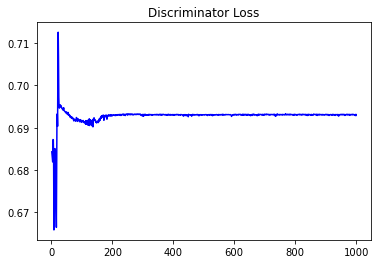

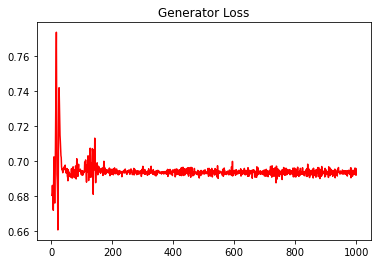

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3877687839716673


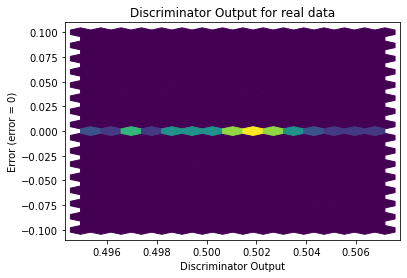

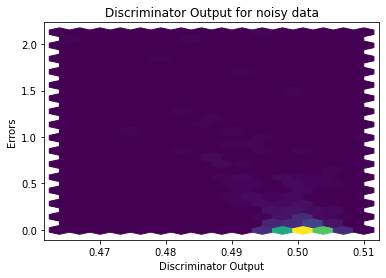

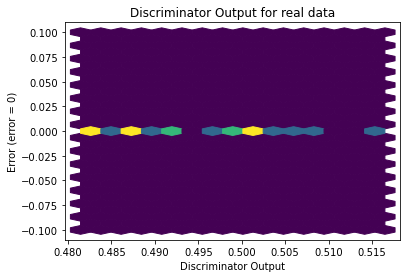

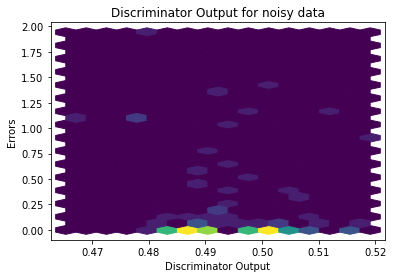

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

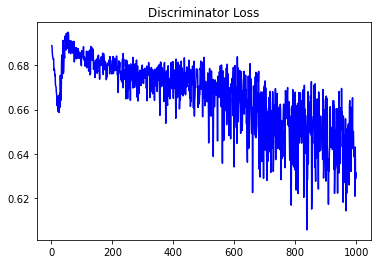

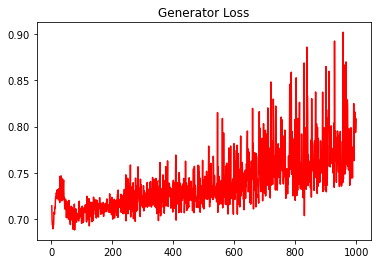

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.40226208820939063


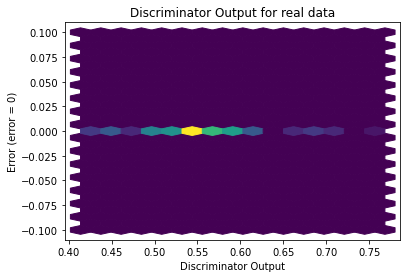

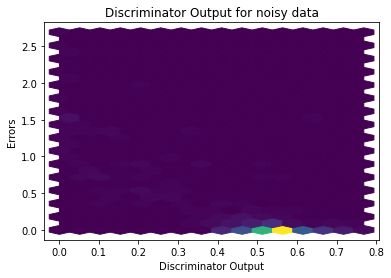

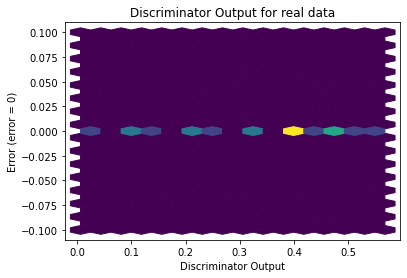

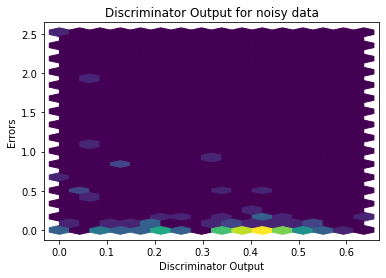

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


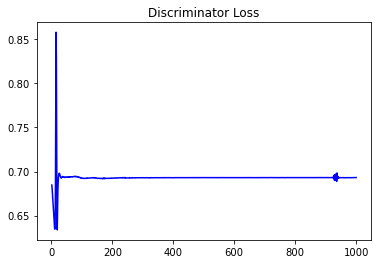

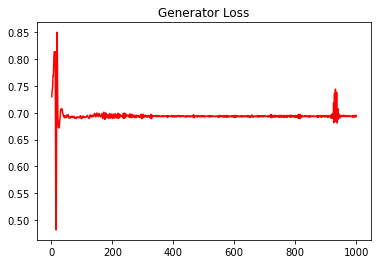

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3930507641583681


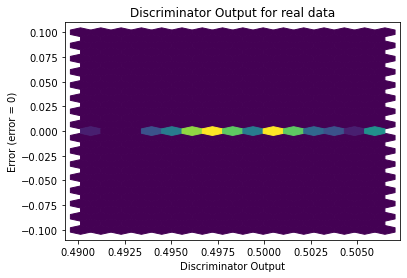

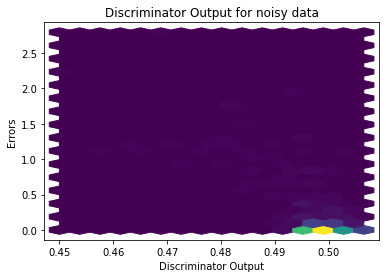

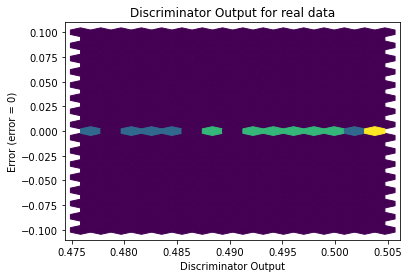

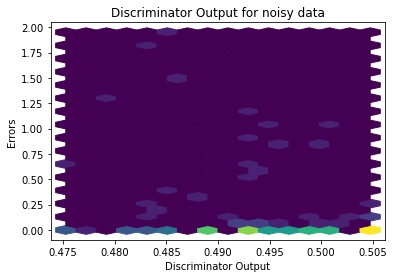

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


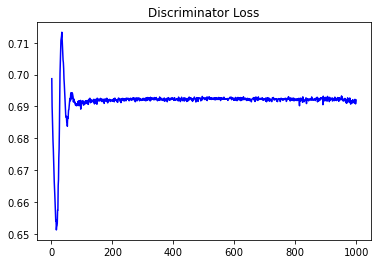

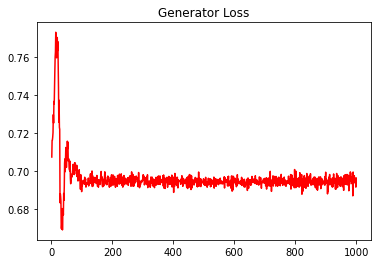

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3891384256929159


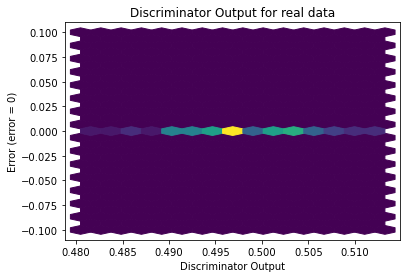

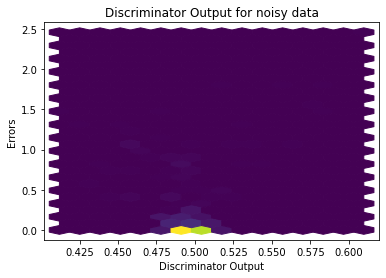

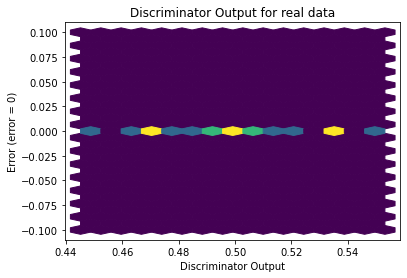

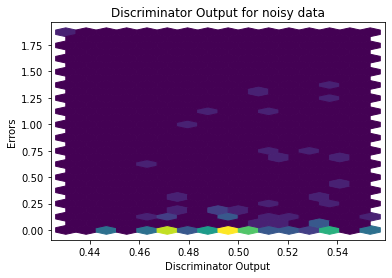

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0776]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1230]], requires_grad=True)
